In [21]:
import os, sys
import tensorflow as tf
from IPython.display import Image
import imghdr

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
test_images_path = 'test_images'

In [16]:
# Loads label file, strips off carriage return
label_lines = [line.rstrip() for line 
                   in tf.gfile.GFile("retrained_labels.txt")]

# Unpersists graph from file
with tf.gfile.FastGFile("retrained_graph.pb", 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

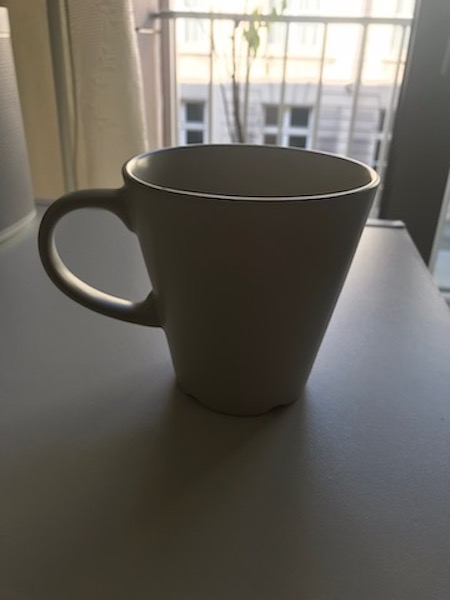

cup (score = 0.98916)
heart (score = 0.00107)
book (score = 0.00056)


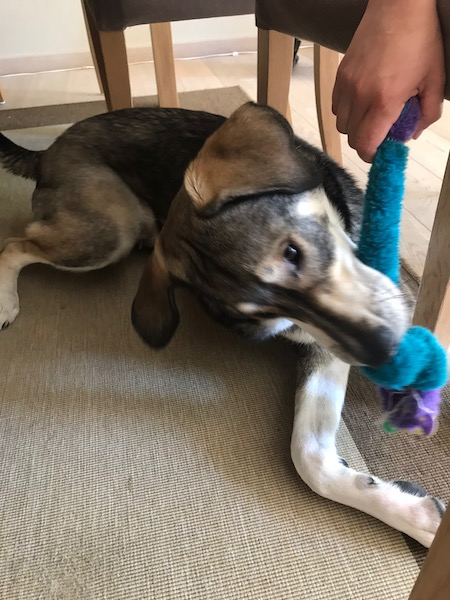

dog (score = 0.81962)
goat (score = 0.02621)
ball (score = 0.01389)


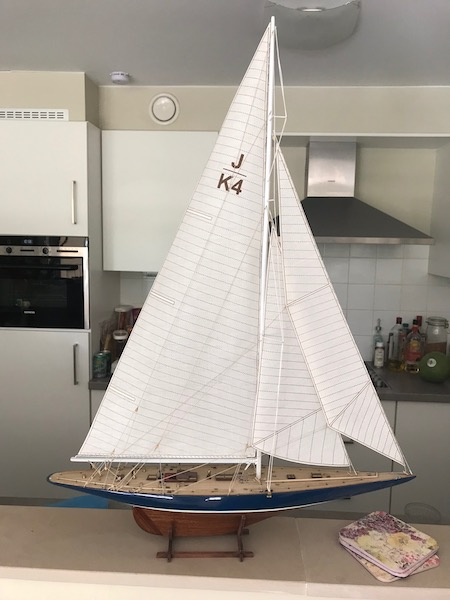

boat (score = 0.59552)
bird (score = 0.05297)
dog (score = 0.02063)


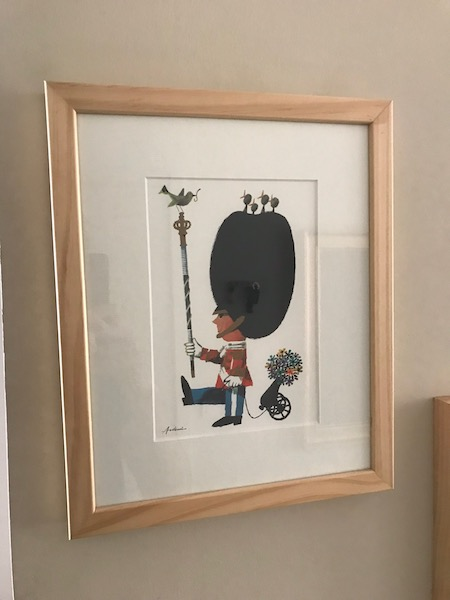

frame (score = 0.93308)
clock (score = 0.00917)
book (score = 0.00900)


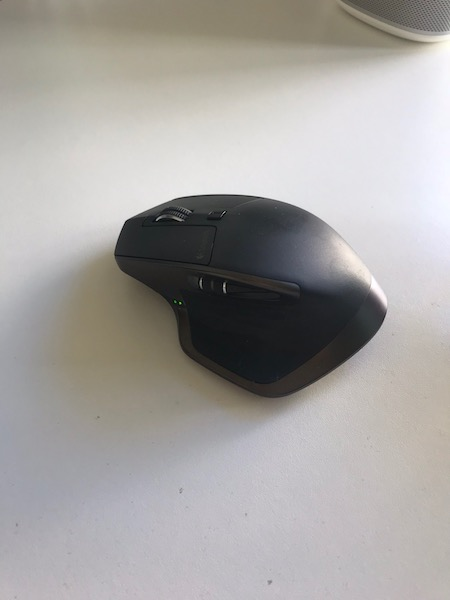

camera (score = 0.08756)
cord (score = 0.07529)
ball (score = 0.04570)


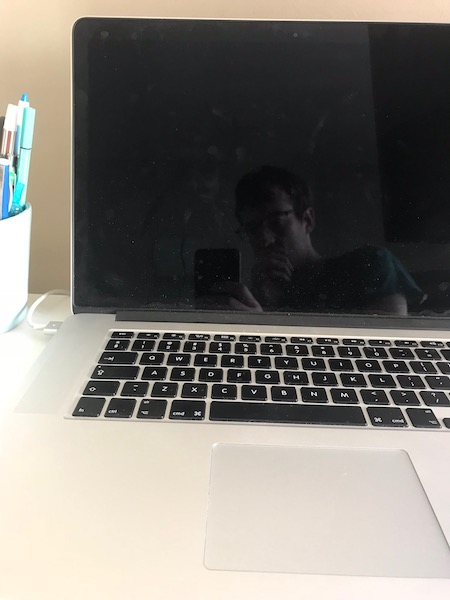

frame (score = 0.10221)
camera (score = 0.05403)
box (score = 0.04798)


In [24]:
with tf.Session() as sess:
    # Feed the image_data as input to the graph and get first prediction
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    
    for image_path in os.listdir(test_images_path):
        # Read in the image_data
        image_path = os.path.join(test_images_path, image_path)
        if(imghdr.what(image_path) != 'jpeg'):
            continue

        image_data = tf.gfile.FastGFile(image_path, 'rb').read()
        predictions = sess.run(softmax_tensor, \
                 {'DecodeJpeg/contents:0': image_data})

        # Sort to show labels of first prediction in order of confidence
        top_k = predictions[0].argsort()[-len(predictions[0]):][::-1][:3]

        display(Image(filename=image_path, width=200))
        for node_id in top_k:
            human_string = label_lines[node_id]
            score = predictions[0][node_id]
            print('%s (score = %.5f)' % (human_string, score))